# Variance Analysis

## [Variance of Xi](#xi):
## [Variance of Yi](#yi):

- Variance year to year for all countries
- Variance for each country over time
- GIF-generator



In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

## Variance of Xi
- _Patents filed (1990-2014)_ ([WIPO](http://www.wipo.int/econ_stat/en/economics/research/))
- _Historical CO2 Abatement (1990-2013)_ ([EnerData Statistical Yearbook](https://yearbook.enerdata.net/))
- _Historical GDP Per Capita (1990-2013)_ ([World Bank](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD))

<a id='xi'></a>

In [58]:
patents = pd.read_csv('./Data/patents.csv')

In [59]:
Countries = ['Belgium', 'France', 'Germany', 'Italy', 'Netherlands', 'Poland', 'Portugal','Romania',
'Spain','United Kingdom','Turkey','Sweden','Norway','Kazakhstan','Ukraine','Uzbekistan','Canada',
'United States','Argentina','Brazil','Chile','Colombia','Mexico','China','India','Indonesia',
'Japan','Malaysia','Thailand','Australia','New Zealand','Algeria','Nigeria','South Africa','Kuwait',
'Saudi Arabia','United Arab Emirates','World'
    ]

Countries.sort()

patents.set_index('Unnamed: 0.1', inplace=True)
patents.drop(['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3'], 
             axis=1, inplace=True)

In [60]:
patents = patents.loc[patents.index.isin(Countries)]

In [77]:
patents.fillna(0, inplace=True)

In [81]:
for i in patents:
    fig, ax = plt.subplots()
    plt.xlim(-5,120)
    plt.ylim(0,.13)
    sns.distplot(np.sqrt(patents[i]), bins=20, ax=ax);
    plt.savefig(f'./patents_over_time/dist_{i}')
    plt.close(fig)
    #put this into terminal when you're inside the folder
    #convert -delay 50 *.png -loop 1 movie.gif

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/

## Variance of Yi
_CO2 Units Abated (2014)_
<a id='yi'></a>

In [20]:
data = pd.read_csv('./Data/abatement_calculations.csv')

In [21]:
data.head()

,Unnamed: 0,country,1990,1991,1992,1993,1994,1995,1996,1997,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,50,Algeria,0.202225,0.423816,0.279782,0.473316,0.215557,0.264797,0.172520,0.099973,...,0.575368,0.220146,0.213309,0.255315,0.305163,0.145226,0.391838,0.487300,0.244277,0.145009
1,31,Argentina,19.996240,17.481589,21.848401,22.734049,25.023233,23.859263,19.327126,24.534814,...,24.550260,30.485044,24.420032,22.278823,25.796694,26.527814,33.006934,30.755172,32.777115,34.941670
2,47,Australia,16.030249,17.586330,17.025245,18.092566,17.349671,16.815236,17.208540,18.701389,...,22.746000,24.600505,23.502631,21.643890,20.462992,23.296032,28.053770,28.407714,35.069814,38.685519
3,7,Belgium,0.511173,0.554798,0.609150,0.555690,0.661508,0.701022,0.664418,0.625552,...,1.225156,1.556691,1.704508,2.024310,2.087651,2.622070,3.184570,4.296034,4.434719,5.201568
4,32,Brazil,498.822545,508.578979,519.888703,627.472911,645.963116,522.499322,506.650645,515.552908,...,396.727435,386.381226,429.039524,365.660548,468.029155,381.564353,427.385829,381.094705,348.394346,339.264127


In [22]:
data.set_index(data['country'], inplace=True)

In [23]:
data.drop('country', axis=1, inplace=True)

In [24]:
data.head()

,Unnamed: 0,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,,,,,,,
Algeria,50,0.202225,0.423816,0.279782,0.473316,0.215557,0.264797,0.172520,0.099973,0.264950,...,0.575368,0.220146,0.213309,0.255315,0.305163,0.145226,0.391838,0.487300,0.244277,0.145009
Argentina,31,19.996240,17.481589,21.848401,22.734049,25.023233,23.859263,19.327126,24.534814,22.464057,...,24.550260,30.485044,24.420032,22.278823,25.796694,26.527814,33.006934,30.755172,32.777115,34.941670
Australia,47,16.030249,17.586330,17.025245,18.092566,17.349671,16.815236,17.208540,18.701389,18.036289,...,22.746000,24.600505,23.502631,21.643890,20.462992,23.296032,28.053770,28.407714,35.069814,38.685519
Belgium,7,0.511173,0.554798,0.609150,0.555690,0.661508,0.701022,0.664418,0.625552,0.742884,...,1.225156,1.556691,1.704508,2.024310,2.087651,2.622070,3.184570,4.296034,4.434719,5.201568
Brazil,32,498.822545,508.578979,519.888703,627.472911,645.963116,522.499322,506.650645,515.552908,523.202597,...,396.727435,386.381226,429.039524,365.660548,468.029155,381.564353,427.385829,381.094705,348.394346,339.264127


In [25]:
emissions = pd.read_csv('./Data/C02_emissions.csv')

In [31]:
emissions.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
for i in emissions:
    fig, ax = plt.subplots()
    plt.xlim(-5,175)
    plt.ylim(0,.07)
    sns.distplot(np.sqrt(emissions[i]), bins=20, ax=ax);
    plt.savefig(f'./emissions_over_time/dist_{i}')
    plt.close(fig)
    #put this into terminal when you're inside the folder
    #convert -delay 50 *.png -loop 1 movie.gif

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/

In [36]:
for i in data:
    fig, ax = plt.subplots()
    plt.xlim(-5,75)
    plt.ylim(0,.2)
    sns.distplot(np.sqrt(data[i]), bins=20, ax=ax);
    plt.savefig(f'./distributions_over_time/dist_{i}')
    plt.close(fig)

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/envs/dsi/lib/python3.6/site-packages/

In [30]:
yoy_var = []
yoy_avg = []
for i in data.iloc[:, 1:]:
    yoy_var.append(data[i].var())
    yoy_avg.append(data[i].mean())

In [31]:
ss = StandardScaler()
yoy_var = ss.fit_transform(pd.Series(yoy_var)
                                     .reshape(-1,1))

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


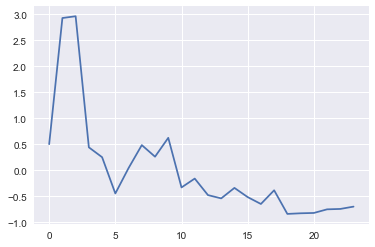

In [32]:
plt.plot(yoy_var);

### Scale after variance for reasons I said at some point

In [33]:
data_sans_norway = data[data.index!='Norway']
yoy_var_snway = [] #excludes norway from dataset
yoy_avg_snway = []

for i in data_sans_norway.iloc[:, 1:]:
    yoy_var_snway.append(data_sans_norway[i].var())
    yoy_avg_snway.append(data_sans_norway[i].mean())

In [34]:
ss = StandardScaler()
yoy_var_snway = ss.fit_transform(pd.Series(yoy_var_snway)
                                     .reshape(-1,1))

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


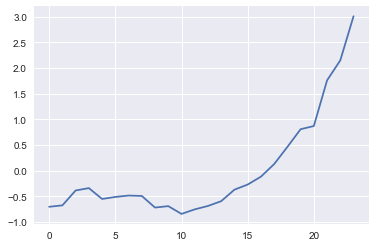

In [35]:
plt.plot(yoy_var_snway);

In [36]:
data_sans_nway_china = data[(data.index!='Norway')&(data.index!='China')]
yoy_var_snway_china = [] #excluding norway and china
yoy_avg_snway_china = []

for i in data_sans_nway_china.iloc[:, 1:]:
    #print(yoy_var_snorway_china[i])
    yoy_var_snway_china.append(data_sans_nway_china[i].var())
    yoy_avg_snway_china.append(data_sans_nway_china[i].mean())

In [37]:
ss = StandardScaler()
yoy_var_snway_china = ss.fit_transform(pd.Series(yoy_var_snway_china)
                                     .reshape(-1,1))

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


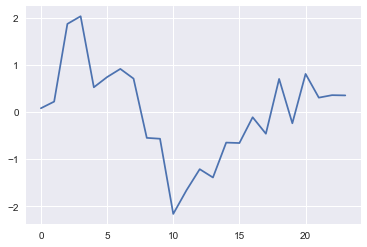

In [38]:
plt.plot(yoy_var_snway_china);

##### The variance across time tells us there is a general upward trend, and quite a bit of variance later in time. However, a global summary statistic will do little to tell us the changes in consumption patterns across countries. 

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


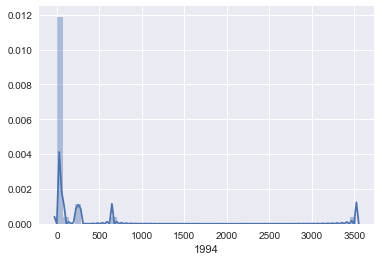

In [39]:
sns.distplot(data['1994']);

In [40]:
ss = StandardScaler()
scaled_data = ss.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data['country'] = data.index
scaled_data.set_index('country', inplace=True)

In [41]:
yoy_var = []
yoy_avg = []
for i in scaled_data.iloc[:, 1:]:
    yoy_var.append(scaled_data[i].var())
    yoy_avg.append(scaled_data[i].mean())

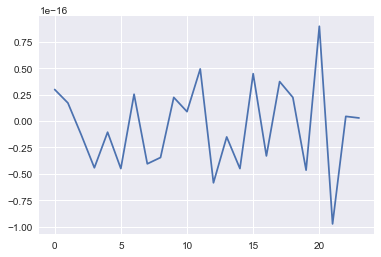

In [42]:
plt.plot(yoy_avg);

In [48]:
plt.plot(yoy_avg_sn);

NameError: name 'yoy_avg_sn' is not defined

In [44]:
country_avg = []
country_var = []
for i in data.index:
    country_avg.append(data.loc[i,:].mean())
    country_var.append(data.loc[i,:].var())

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


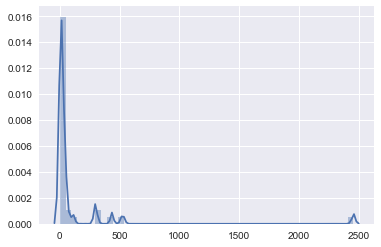

In [45]:
sns.distplot(country_avg);

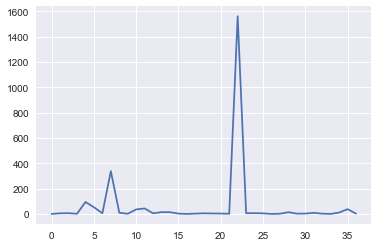

In [47]:
plt.plot(np.sqrt(country_var));